**LAB-5(A) Computer Vision (CV)**

*   Mudasir
*   22K-8732

**Lab-5A (Segmentation)**

Saving Rheumatology_Open_fracture.png to Rheumatology_Open_fracture (1).png


Text(0.5, 1.0, 'Thresholded')

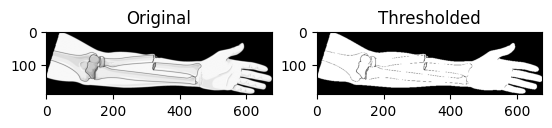

In [6]:
# Task 1: Thresholding (X-ray fracture)

from google.colab import files
import cv2, numpy as np, matplotlib.pyplot as plt

uploaded = files.upload()
fname = next(iter(uploaded))
img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 0)

_, th = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(th, cmap='gray'); plt.title("Thresholded")

Text(0.5, 1.0, 'Region Grown Cell')

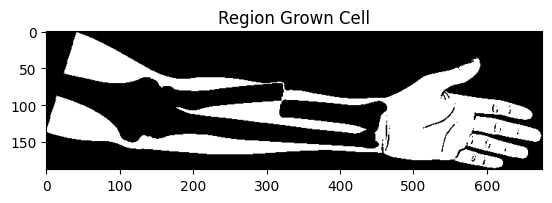

In [7]:
# Task 2: Region Growing (Microscope cells)

from skimage.segmentation import flood
seed_point = (50,50)  # pick inside a cell
mask = flood(img, seed_point, tolerance=20)

plt.imshow(mask, cmap='gray'); plt.title("Region Grown Cell")

Text(0.5, 1.0, 'Watershed Segmentation')

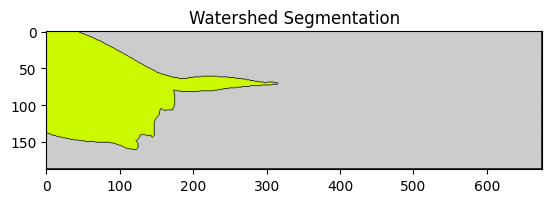

In [8]:
# Task 3: Watershed (Overlapping coins)

import cv2, numpy as np, matplotlib.pyplot as plt
from scipy import ndimage

blur = cv2.medianBlur(img, 5)
ret, th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dist = ndimage.distance_transform_edt(th)
ret, markers = cv2.connectedComponents((dist>20).astype(np.uint8))
markers = cv2.watershed(cv2.cvtColor(img,cv2.COLOR_GRAY2BGR), markers)

plt.imshow(markers, cmap='nipy_spectral'); plt.title("Watershed Segmentation")

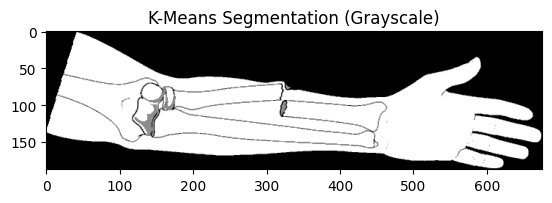

In [10]:
# Task 4: Clustering (Colorful flowers)

# Check if the image is grayscale or color
if len(img.shape) == 2: # Grayscale image
  Z = img.reshape((-1,1)).astype(np.float32)
else: # Color image
  Z = img.reshape((-1,3)).astype(np.float32)

K=3
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Reshape the center back to the original image shape
if len(img.shape) == 2: # Grayscale image
  center = np.uint8(center)
  segmented = center[label.flatten()].reshape(img.shape)
  plt.imshow(segmented, cmap='gray'); plt.title("K-Means Segmentation (Grayscale)")
else: # Color image
  center = np.uint8(center)
  segmented = center[label.flatten()].reshape(img.shape)
  plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)); plt.title("K-Means Segmentation (Color)")